In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Advertising data with StatsModel

[Statsmodel](http://statsmodels.sourceforge.net/)


In [93]:
df = pd.read_csv('../data/advertising.csv', index_col=0)
df.sort_values('TV', inplace=True)
print('--------------------')
print(' TV - Head ')
print('--------------------')
print(df.head())
print('--------------------')
print(' Describe ')
print('--------------------')
print(df.describe())

--------------------
 TV - Head 
--------------------
      TV  Radio  Newspaper  Sales
131  0.7   39.6        8.7    1.6
156  4.1   11.6        5.7    3.2
79   5.4   29.9        9.4    5.3
57   7.3   28.1       41.4    5.5
127  7.8   38.9       50.6    6.6
--------------------
 Describe 
--------------------
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


### Features and Outcome

* Features are TV, Radio, Newspaper
* Outcome is Sales

## Quick correlation visualization

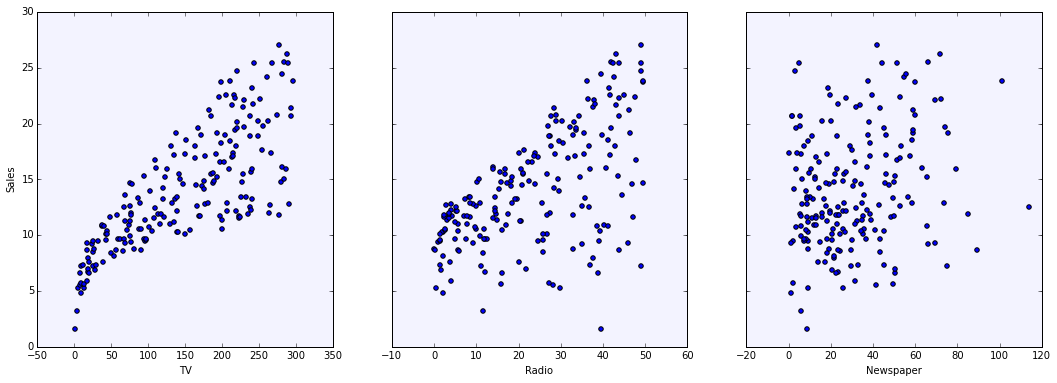

In [94]:
# 3 subplots that share the y axis
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
# axs is an array holding the different subplots

df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0])
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Question:
Do we have **Causal Relations** between the features (TV, Radio, Newspaper) and the outcome (Sales)?

### Let's look at the relation between TV ads and Sales


In [95]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV', data=df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        19:29:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation of the OLS model
This summary provides quite a lot of information about the fit. 
The parts of the table we think are the most important are bolded in the description below.

The left part of the first table provides basic information about the model fit:

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Dep. Variable</td>
<td>Which variable is the response in the model</td>
</tr>
<tr>
<td>Model</td>
<td>What model you are using in the fit</td>
</tr>
<tr>
<td>Method</td>
<td>How the parameters of the model were calculated</td>
</tr>
<tr>
<td>No. Observations</td>
<td>The number of observations (examples)</td>
</tr>
<tr>
<td>DF Residuals</td>
<td>Degrees of freedom of the residuals. Number of observations - number of parameters</td>
</tr>
<tr>
<td>DF Model</td>
<td>Number of parameters in the model (not including the constant term if present)</td>
</tr>
</tbody>
</table>

The right part of the first table shows the goodness of fit

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>**R-squared**</td>
<td>The [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination). A statistical measure of how well the regression line approximates the real data points</td>
</tr>
<tr>
<td>**Adj. R-squared**</td>
<td>The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals</td>
</tr>
<tr>
<td>F-statistic</td>
<td>A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals</td>
</tr>
<tr>
<td>Prob (F-statistic)</td>
<td>The probability that you would get the above statistic, given the null hypothesis that they are unrelated</td>
</tr>
<tr>
<td>Log-likelihood</td>
<td>The log of the likelihood function.</td>
</tr>
<tr>
<td>AIC</td>
<td>The [Akaike Information Criterion](http://en.wikipedia.org/wiki/Akaike_information_criterion). Adjusts the log-likelihood based on the number of observations and the complexity of the model.</td>
</tr>
<tr>
<td>BIC</td>
<td>The [Bayesian Information Criterion](http://en.wikipedia.org/wiki/Bayesian_information_criterion). Similar to the AIC, but has a higher penalty for models with more parameters.</td>
</tr>
</tbody>
</table>

The second table reports for each of the coefficients

<table>
<thead>
<tr>
<th></th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td></td>
<td>The name of the term in the model</td>
</tr>
<tr>
<td>coef</td>
<td>The estimated value of the coefficient</td>
</tr>
<tr>
<td>std err</td>
<td>The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.</td>
</tr>
<tr>
<td>t</td>
<td>The t-statistic value. This is a measure of how statistically significant the coefficient is.</td>
</tr>
<tr>
<td><strong>P &gt; |t|</strong></td>
<td>P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.</td>
</tr>
<tr>
<td>**[95.0% Conf. Interval]**</td>
<td>The lower and upper values of the 95% confidence interval</td>
</tr>
</tbody>
</table>

Finally, there are several statistical tests to assess the distribution of the residuals 

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Skewness</td>
<td>A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).</td>
</tr>
<tr>
<td>Kurtosis</td>
<td>A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).</td>
</tr>
<tr>
<td>Omnibus</td>
<td>D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.</td>
</tr>
<tr>
<td>Prob(Omnibus)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Jarque-Bera</td>
<td>A different test of the skewness and kurtosis</td>
</tr>
<tr>
<td>Prob (JB)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Durbin-Watson</td>
<td>A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis</td>
</tr>
<tr>
<td>Cond. No</td>
<td>A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).</td>
</tr>
</tbody>
</table>


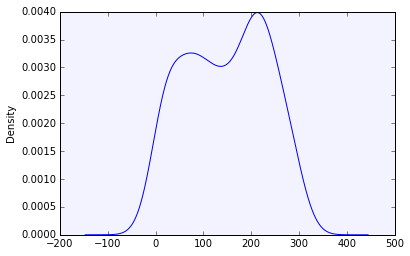

In [96]:
# Skewed ? Kurtosis? Let's check
df.TV.plot(kind="density")


# Less samples

What if we had less samples? 100 instead of 200

In [97]:
lm2 = smf.ols(formula='Sales ~ TV', data=df.sample(100) ).fit()

print('--------------------')
print('  200 samples ')
print('--------------------')
print(lm.summary())
print('--------------------')
print('  100 samples ')
print('--------------------')
print(lm2.summary())


--------------------
  200 samples 
--------------------
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        19:29:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------

# Prediction

Let's create 50 new samples


In [98]:
X_new = pd.DataFrame({'TV': np.linspace(100, 500, 55)})
X_new.head()

,TV
0,100.000000
1,107.407407
2,114.814815
3,122.222222
4,129.629630


In [99]:
y_hat = lm.predict(X_new)

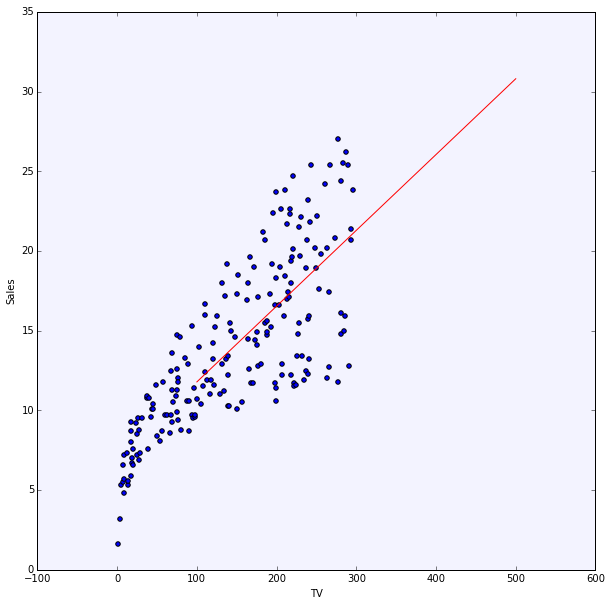

In [101]:
slope = lm.params[0]
intercept = lm.params[1]

fig, ax = plt.subplots(figsize=(10,10))
# scatterplot of samples
ax.scatter(df.TV, df.Sales  )

# Linear prediction
ax.plot(X_new,  y_hat, color='red')

plt.xlabel('TV')
plt.ylabel('Sales')


# add a quadratic term

In [113]:
df['TV2'] = df.TV**2 / np.mean(df.TV)
df.head()
df.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales', 'TV2'], dtype='object')

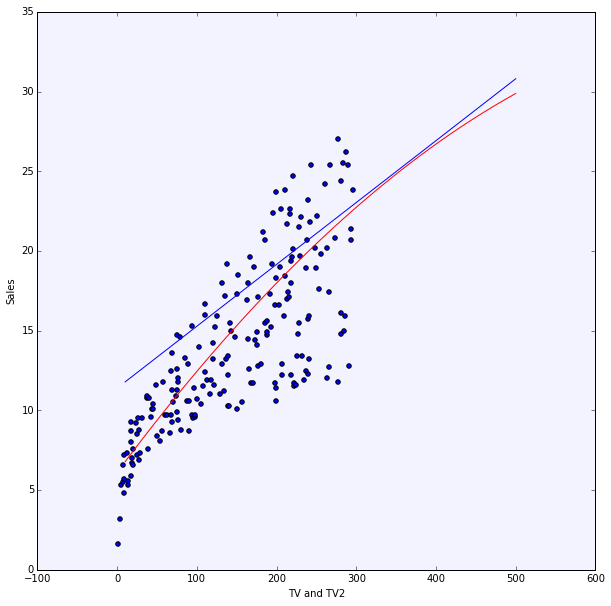

In [114]:
lm3 = smf.ols(formula='Sales ~ TV + TV2', data=df ).fit()

X_new = pd.DataFrame({'TV': np.linspace(10, 500, 55)})
X_new['TV2'] = X_new.TV**2 / np.mean(X_new.TV)

y_hat3 = lm3.predict(X_new)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.TV, df.Sales )
ax.plot(X_new.TV,  y_hat, color='blue')
ax.plot(X_new.TV,  y_hat3, color='red')
plt.xlabel('TV and TV2')
plt.ylabel('Sales')

# is that a better model?

In [115]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           5.21e-42
Time:                        19:33:43   Log-Likelihood:                -517.18
No. Observations:                 200   AIC:                             1040.
Df Residuals:                     197   BIC:                             1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1141      0.659      9.275      0.000         4.814     7.414
TV             0.0673      0.011      6.349      0.000         0.046     0.088
TV2           -0.0101      0.005     -1.924      0.056        -0.020     0.000
==============================================================================
Omnibus:                        0.681   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.770
Skew:                          -0.012   Prob(JB):                        0.681
Kurtosis:                       2.697   Cond. No.                         895.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# All the variables now

In [116]:
lm4 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df ).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.58e-96
Time:                        19:34:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# First model Sales ~ TV

In [117]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        19:34:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

# Second model Sales ~ TV + Radio + Newspaper

In [118]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 29 Jun 2016   Prob (F-statistic):           1.58e-96
Time:                        19:34:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [119]:
lm4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

# Hypothesis Testing and p-values

Closely related to confidence intervals is hypothesis testing. 

* You start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. 

* Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

Note: that "failing to reject" the null is not the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

As it relates to model coefficients, here is the conventional hypothesis test:

* null hypothesis: There is no relationship between TV ads and Sales 
    * and thus a = 0 in $$ Sales = a * TV + b $$

* alternative hypothesis: There is a relationship between TV ads and Sales (and thus a != 0)

**How do we test this hypothesis?**


The p-value represents the probability that the coefficient is actually zero

* if \\( P_{value} > 0.05 \\) then there more than 5% chance that the null hypothesis is true (a = 0) 
    * => can't reject
    * Note: does not mean the null hypothesis **is** true, could be
* if \\( P_{value} < 0.05 \\) then there's less than 5% chance that the null hypothesis is true  
    * =>  reject the null hypothesis 
    * => more than 95% chance the opposite is true


In [120]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [121]:
lm4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In the Sales ~ TV model,  \\( P_{value} \ll 0.05 \\)  => strong confidence

In the Sales ~ TV + Radio + Newspaper  model,  

* TV \\( P_{value} \ll 0.05 \\)  => strong confidence
* Radio \\( P_{value} \ll 0.05 \\)  => strong confidence
* Newspaper \\( P_{value} \gt 0.05 \\)  => No confidence. The slightly coef cannot be trusted -0.0010

# confidence interval

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

ValueError: x and y must have same first dimension

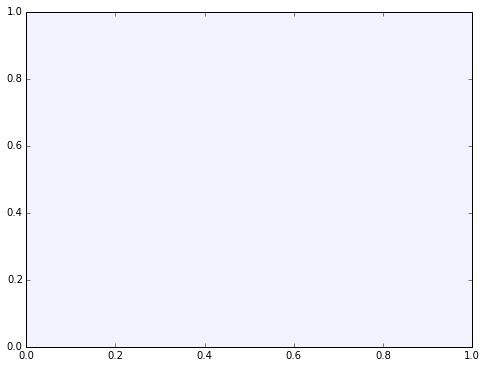

In [123]:
# plot with confidence interval

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(df.TV, df.Sales )
# ax.plot(X_new.TV,  y_hat, color='blue')
# ax.plot(X_new.TV,  y_hat3, color='red')
# plt.xlabel('TV and TV2')
# plt.ylabel('Sales')
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(lm4)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df.TV, y_hat3, 'o', label="data")
ax.plot(df.TV, df.Sales, 'b-', label="True")
ax.plot(df.TV, res.fittedvalues, 'r--.', label="OLS")
ax.plot(df.TV, iv_u, 'r--')
ax.plot(df.TV, iv_l, 'r--')
ax.legend(loc='best');